In [1]:
#I would like to inform you that i just start this task today for the reason of traveling. 
#I have collected data for four years (1435 -1436- 1437- 1438)

The NULL Hypothesis (Ho):
        people tend to die more (often) in the month of Shaban.


In [13]:
Sys.setlocale("LC_ALL","Arabic")

[1] "LC_COLLATE=Arabic_Saudi Arabia.1256;LC_CTYPE=Arabic_Saudi Arabia.1256;LC_MONETARY=Arabic_Saudi Arabia.1256;LC_NUMERIC=C;LC_TIME=Arabic_Saudi Arabia.1256"

In [3]:
df <- data.frame(matrix(ncol = 5, nrow = 0))
df_col <- c("name", "gender", "nationality", "age", "Date of burial")
colnames(df) <- df_col

In [4]:
#install.packages("RSelenium")
library("RSelenium")
driver <- rsDriver(browser=c("chrome"), chromever="75.0.3770.90", port=4441L)
remDr <- driver[["client"]]

Registered S3 method overwritten by 'openssl':
  method      from
  print.bytes Rcpp
checking Selenium Server versions:
BEGIN: PREDOWNLOAD
BEGIN: DOWNLOAD
BEGIN: POSTDOWNLOAD
checking chromedriver versions:
BEGIN: PREDOWNLOAD
BEGIN: DOWNLOAD
BEGIN: POSTDOWNLOAD
checking geckodriver versions:
BEGIN: PREDOWNLOAD
BEGIN: DOWNLOAD
BEGIN: POSTDOWNLOAD
checking phantomjs versions:
BEGIN: PREDOWNLOAD
BEGIN: DOWNLOAD
BEGIN: POSTDOWNLOAD


[1] "Connecting to remote server"
$acceptInsecureCerts
[1] FALSE

$browserName
[1] "chrome"

$browserVersion
[1] "75.0.3770.90"

$chrome
$chrome$chromedriverVersion
[1] "75.0.3770.90 (a6dcaf7e3ec6f70a194cc25e8149475c6590e025-refs/branch-heads/3770@{#1003})"

$chrome$userDataDir
[1] "C:\\Users\\walsa\\AppData\\Local\\Temp\\scoped_dir14616_30447"


$`goog:chromeOptions`
$`goog:chromeOptions`$debuggerAddress
[1] "localhost:50983"


$networkConnectionEnabled
[1] FALSE

$pageLoadStrategy
[1] "normal"

$platformName
[1] "windows nt"

$proxy
named list()

$setWindowRect
[1] TRUE

$strictFileInteractability
[1] FALSE

$timeouts
$timeouts$implicit
[1] 0

$timeouts$pageLoad
[1] 300000

$timeouts$script
[1] 30000


$unhandledPromptBehavior
[1] "dismiss and notify"

$webdriver.remote.sessionid
[1] "c85331852ec83d278e400ad4deb781da"

$id
[1] "c85331852ec83d278e400ad4deb781da"



In [5]:
remDr$navigate("https://services.amana-md.gov.sa/eservicesite/Inq/DeathInquiry.aspx")

In [6]:
# I have run this part of code several times due to lost connection
j <- 1

for (l in 1:500){
    
    if(j == 21){
        j <- 1
    } 
    
    


for (i in 3:77){
    
    n <- as.character(i)
    row_col1 <- '//*[@id="ctl00_ContentPlaceHolder1_dgDeath"]/tbody/tr[rowNumber]/td[1]'
    row_col2 <- '//*[@id="ctl00_ContentPlaceHolder1_dgDeath"]/tbody/tr[rowNumber]/td[2]'
    row_col3 <- '//*[@id="ctl00_ContentPlaceHolder1_dgDeath"]/tbody/tr[rowNumber]/td[3]'
    row_col4 <- '//*[@id="ctl00_ContentPlaceHolder1_dgDeath"]/tbody/tr[rowNumber]/td[4]'
    row_col5 <- '//*[@id="ctl00_ContentPlaceHolder1_dgDeath"]/tbody/tr[rowNumber]/td[5]'

    row_col1 <- gsub("rowNumber",i,ignore.case=T,row_col1)
    row_col2 <- gsub("rowNumber",i,ignore.case=T,row_col2)
    row_col3 <- gsub("rowNumber",i,ignore.case=T,row_col3)
    row_col4 <- gsub("rowNumber",i,ignore.case=T,row_col4)
    row_col5 <- gsub("rowNumber",i,ignore.case=T,row_col5)

    rowElem1 <- remDr$findElement(using = 'xpath',row_col1)
    rowElem2 <- remDr$findElement(using = 'xpath',row_col2)
    rowElem3 <- remDr$findElement(using = 'xpath',row_col3)
    rowElem4 <- remDr$findElement(using = 'xpath',row_col4)
    rowElem5 <- remDr$findElement(using = 'xpath',row_col5)
    
    row_text1 <- rowElem1$getElementText()
    row_text2 <- rowElem2$getElementText()
    row_text3 <- rowElem3$getElementText()
    row_text4 <- rowElem4$getElementText()
    row_text5 <- rowElem5$getElementText()
    
    
    
    new_row <- data.frame(row_text1, row_text2, row_text3, row_text4, row_text5)
    names(new_row)<- df_col
    df <- rbind(df, new_row)



  
}

j <- j+1

jj <- as.character(j)
page_path <- '//*[@id="ctl00_ContentPlaceHolder1_dgDeath"]/tbody/tr[1]/td/a[pageNumber]'
page_path <- gsub("pageNumber",jj,ignore.case=T,page_path)

webElem <- remDr$findElement(using = 'xpath', page_path)

webElem$clickElement()
}

In [15]:
#saveRDS(df, file="C:/Users/walsa/Desktop/DS/data/Rdata3.Rda")
bar <- readRDS(file="C:/Users/walsa/Desktop/DS/data/finaldata.Rda")


In [16]:
dim(bar)

[1] 23769     5

In [19]:
library(tidyr)

df <- bar %>%
      separate("Date of burial", sep="/", into = c("year", "month", "day"))

In [20]:
df

,name,gender,nationality,age,year,month,day
38,ابن/هاجر سالم الحربي,ذكر,سعودي,1 يوم,1435,01,01
39,روسميلي سيدي محمد نور,أنثى,إندونيسي,68 سنة,1435,01,01
40,مرشود راشد نافل الجابري,ذكر,سعودي,104 سنة,1435,01,01
41,لبنا سعيد,أنثى,يمني,55 سنة,1435,01,01
42,رابول بي بي,أنثى,هندي,53 سنة,1435,01,01
43,عوده فريج صالح العطوي,ذكر,سعودي,91 سنة,1435,01,01
44,جنين/منىجابر عواض الجابري,أنثى,سعودي,19 يوم,1435,01,01
45,بدريه ياسين محمد سعيد نحاس,أنثى,سعودي,79 سنة,1435,01,01
46,عزام مروان عبدالله الجهني,ذكر,سعودي,11 سنة,1435,01,01
47,اسنياه دجات كيمان,أنثى,إندونيسي,60 سنة,1435,01,01


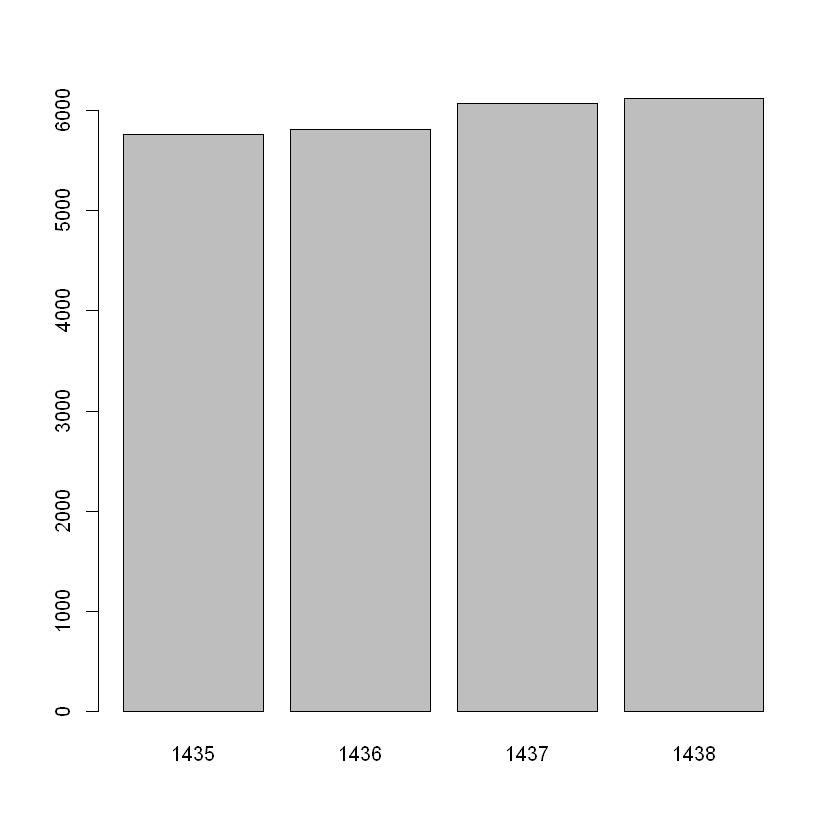

In [22]:
barplot(table(df$year))

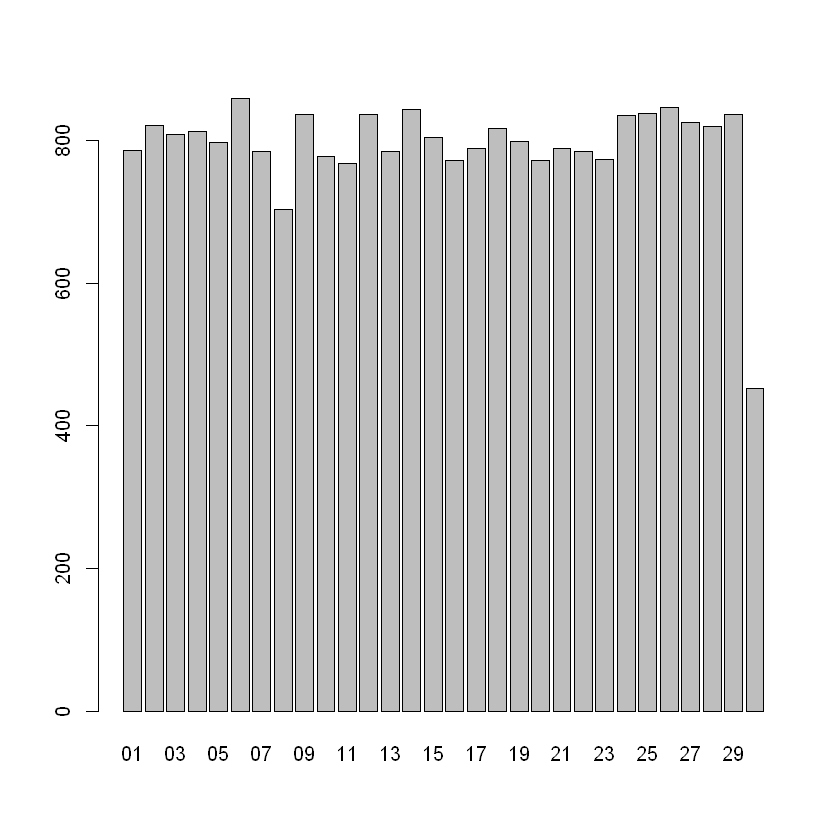

In [24]:
barplot(table(df$day))

In [25]:
nationality <- as.data.frame(table(df$nationality))
nationality

Var1,Freq
سعودي,13587
هندي,745
باكستاني,2789
يمني,667
مالي,84
ماليزي,105
فلبيني,29
إندونيسي,672
افغاني,534
سوري,465


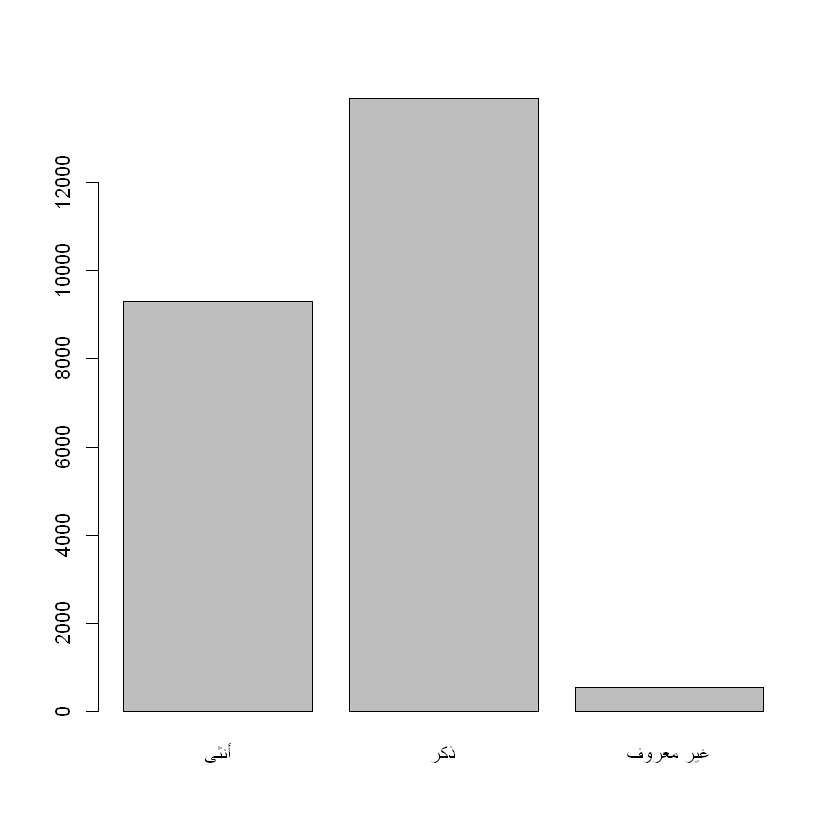

In [27]:
barplot(table(df$gender))

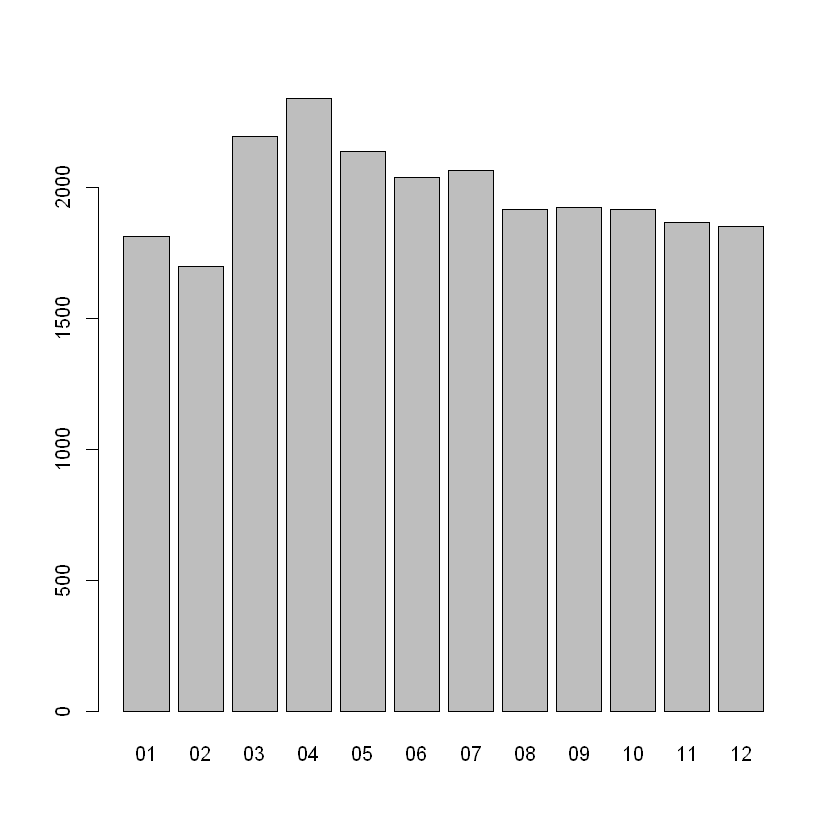

In [26]:
barplot(table(df$month))

# according to analysis for the collected data ,  we reject H0 Hypothesis that mean we reject your friend statement.